<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/G1_Predict_%E0%B8%A3%E0%B8%AD%E0%B8%9A%E0%B8%97%E0%B8%B5%E0%B9%881_Gender_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 612 (delta 117), reused 103 (delta 103), pack-reused 478
Receiving objects: 100% (612/612), 11.45 MiB | 18.20 MiB/s, done.
Resolving deltas: 100% (357/357), done.
/content/efficientnet_keras_transfer_learning


In [ ]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/Data_Gender.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07F,V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
1,2,1,7,Y07F,Flip_V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
2,3,2,7,Y07F,V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
3,4,2,7,Y07F,Flip_V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
4,5,3,7,Y07F,V3.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,Flip_J463.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4746,122,78,25,Y25M,J464.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4747,123,78,25,Y25M,Flip_J464.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4748,124,79,25,Y25M,J465.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/1.1_รอบแรก_Gender_100.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/1.1_รอบแรก_Gender_100.h5')
height = width = model.input_shape[1]

In [ ]:
base_dir = '/content/drive/MyDrive/TVT_Gender'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
# os.makedirs(test_dir, exist_ok=True)

In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2850 images belonging to 2 classes.
{0: 'Female', 1: 'Male'}


In [ ]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07F,V67.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
101,102,51,7,Y07F,Flip_V67.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
102,103,52,7,Y07F,V68.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
103,104,52,7,Y07F,Flip_V68.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
104,105,53,7,Y07F,V69.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,Female,Both
...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,Flip_J463.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4746,122,78,25,Y25M,J464.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4747,123,78,25,Y25M,Flip_J464.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both
4748,124,79,25,Y25M,J465.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,Male,Both


In [ ]:
act = test['Sex'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])

1/1 [==============================] - 0s 65ms/step


array([0.79298335, 0.20701662], dtype=float32)

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 59ms/step


In [ ]:
pred_list

['Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 '

In [ ]:
prob_list[0]

0.79298335

In [ ]:
pred = np.array(pred_list) #แปลงเป็น array
act = np.array(act)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 65.89473684210526%
              precision    recall  f1-score   support

      Female       0.65      0.69      0.67       475
        Male       0.67      0.62      0.65       475

    accuracy                           0.66       950
   macro avg       0.66      0.66      0.66       950
weighted avg       0.66      0.66      0.66       950



Text(0.5, 66.5, 'Predicted label')

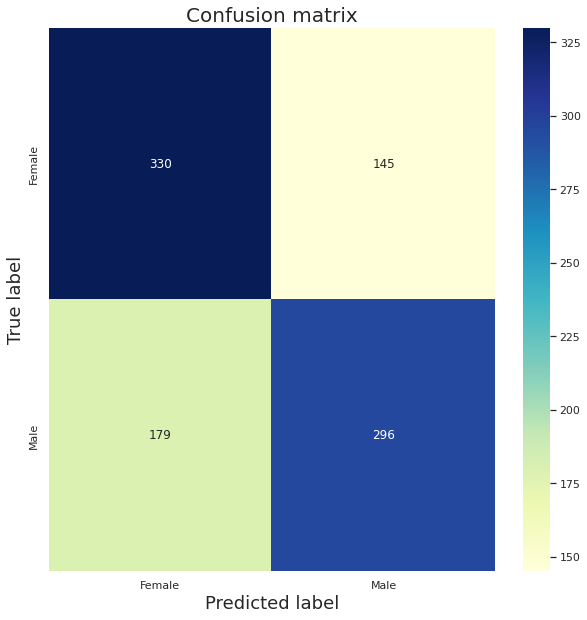

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)